In [2]:
import pandas as pd
import numpy as np
from sktime.forecasting import tbats

In [2]:
temp_df = pd.read_csv("C:\\Users\\Лев\\Projects\\Diploma\\sbp2.csv", sep=';')
temp_df['time'] = pd.to_datetime(temp_df['time'], dayfirst=True)
temp_df = temp_df.sort_values(by=['time'])
temp = pd.DataFrame(pd.date_range(start=temp_df['time'][55215], end=temp_df['time'][0], freq='3 h'), columns=['time'])
temp = temp.set_index('time').join(temp_df.set_index('time'), how='left')
temp = temp['T'].ffill()
temp.index = pd.date_range(start=temp_df['time'][55215], end=temp_df['time'][0], freq='3 h')
temp

2005-03-01 00:00:00   -12.1
2005-03-01 03:00:00   -13.7
2005-03-01 06:00:00   -14.6
2005-03-01 09:00:00   -15.2
2005-03-01 12:00:00   -13.5
                       ... 
2024-02-17 09:00:00     2.3
2024-02-17 12:00:00     2.9
2024-02-17 15:00:00     3.3
2024-02-17 18:00:00     1.0
2024-02-17 21:00:00     0.6
Freq: 3H, Name: T, Length: 55424, dtype: float64

In [3]:
def mae(y_true, y_pred): 
    return np.mean(np.abs(y_true - y_pred))

In [4]:
from sktime.forecasting.model_selection import temporal_train_test_split

temp_train, temp_test = temporal_train_test_split(temp, test_size=2920)

In [5]:
tbats_model = tbats.TBATS(use_box_cox=False, use_trend=False, sp=[8, 2922])
tbats_model.fit(temp_train[-20000:])

TBATS(sp=[8, 2922], use_box_cox=False, use_trend=False)

In [7]:
tbats_model.save("tbats")

<zipfile.ZipFile filename='tbats.zip' mode='r'>

In [5]:
tbats_model = tbats.TBATS.load_from_path("C:\\Users\\Лев\\Projects\\Diploma\\tbats.zip")

In [8]:
tbats_model.get_config()

{'display': 'diagram',
 'print_changed_only': True,
 'check_clone': False,
 'clone_config': True,
 'warnings': 'on',
 'backend:parallel': None,
 'backend:parallel:params': None,
 'remember_data': True}

In [ ]:
results = np.array([tbats_model.predict(range(1,25))])

for i in range(358):
    print(round(i / 358, 4))
    tbats_model.update(temp_test[8*i:8*(i+1)], update_params=False)
    results = np.append(results, [tbats_model.predict(range(1,25))], axis=0)

In [ ]:
maes = [mae(results[:,j], temp_test[[8*i + j for i in range(359)]]) for j in range(24)]

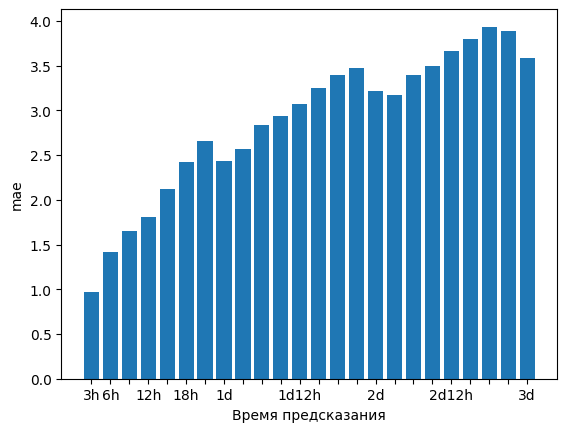

In [36]:
import matplotlib.pyplot as plt

names=['3h','6h','               ','12h','              ','18h','             ','1d','            ','           ','          ','1d12h','         ','        ','       ','2d', ' ','  ','   ','2d12h','    ','     ','      ','3d']
plt.bar(x=names, height=maes)
plt.xlabel("Время предсказания")
plt.ylabel("mae")
plt.show()